In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/Social_Network_Ads

/gdrive/MyDrive/Social_Network_Ads


In [4]:
ls

Social_Network_Ads.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [7]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# EDA

In [10]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [12]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [14]:
binary_cols

['Gender', 'Purchased']

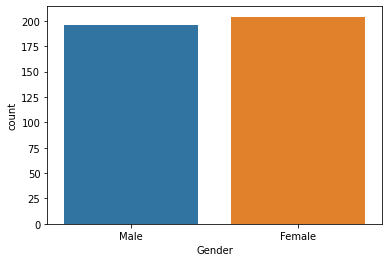

In [15]:
sns.countplot("Gender", data=df)

In [23]:
Gender_numeric = {'Male':1, 'Female':0}
df.Gender.replace(Gender_numeric, inplace=True)

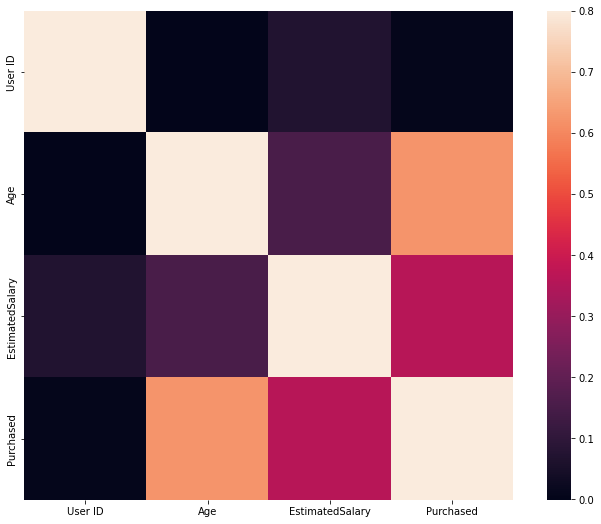

In [17]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

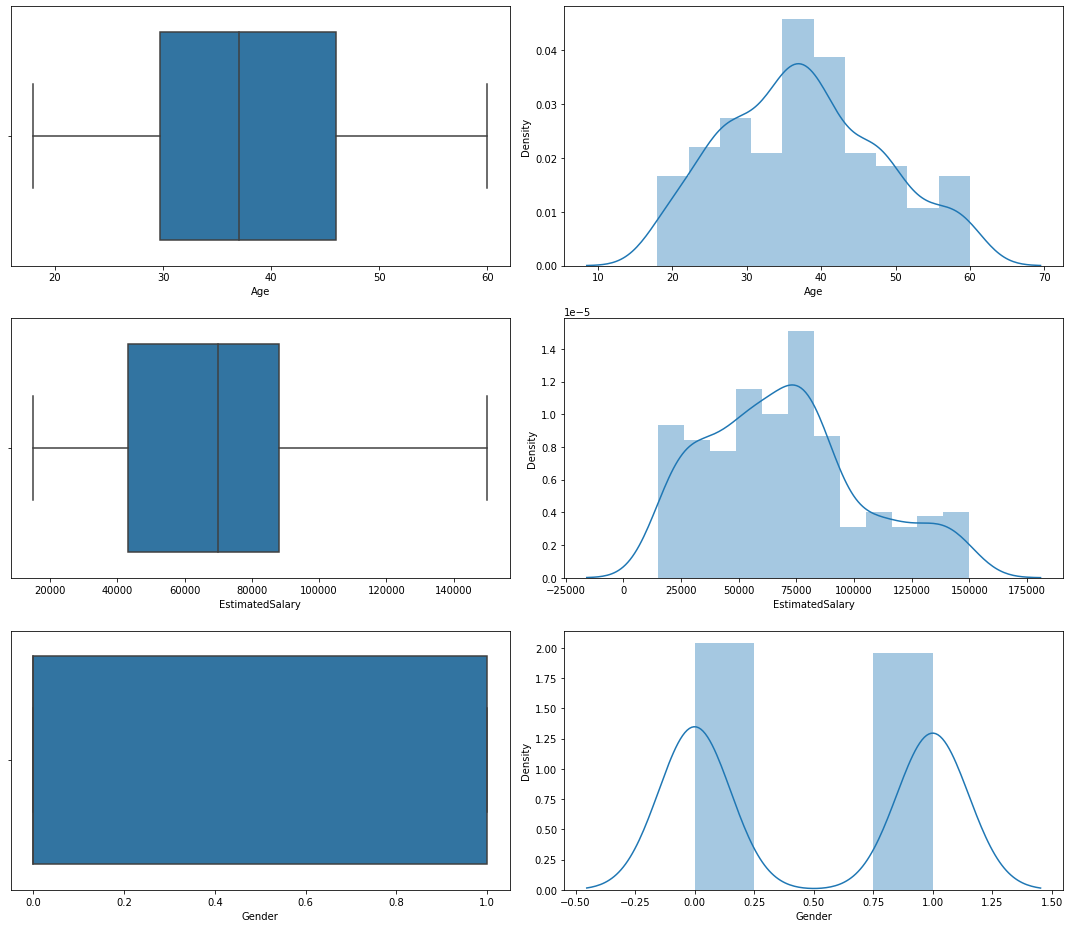

In [25]:
fig, ax = plt.subplots(3, 2, figsize = (15, 13))
sns.boxplot(x= df["Age"], ax = ax[0,0])
sns.distplot(df['Age'], ax = ax[0,1])
sns.boxplot(x= df["EstimatedSalary"], ax = ax[1,0])
sns.distplot(df['EstimatedSalary'], ax = ax[1,1])
sns.boxplot(x= df["Gender"], ax = ax[2,0])
sns.distplot(df['Gender'], ax = ax[2,1])
plt.tight_layout()

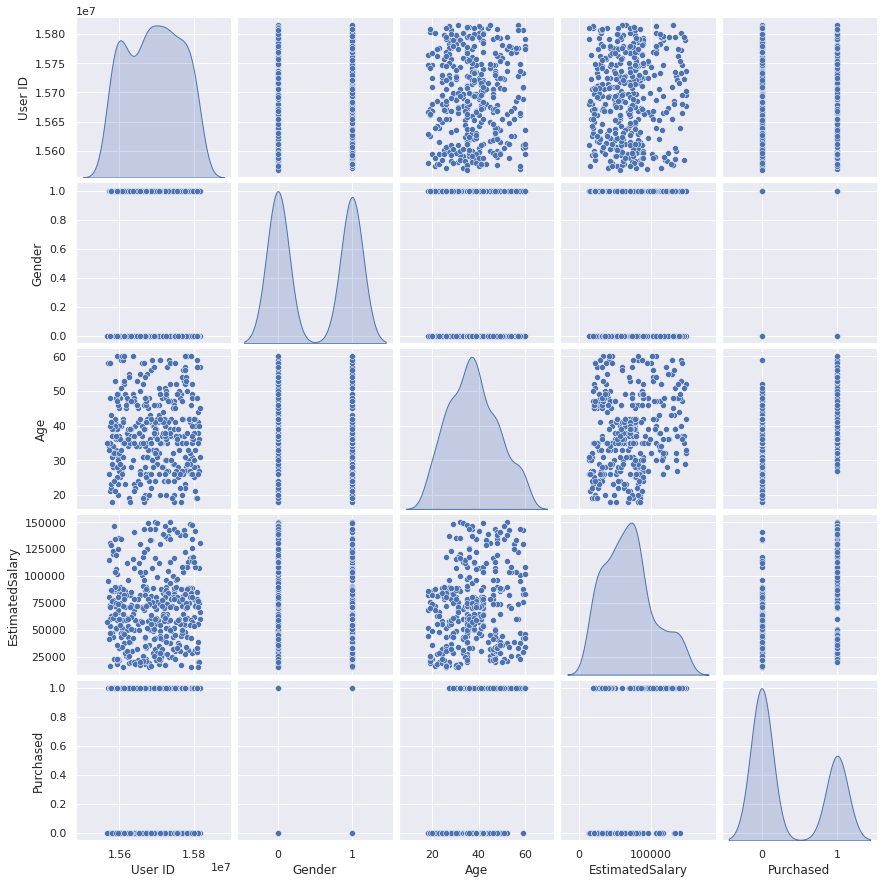

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

Text(0, 0.5, 'Age')

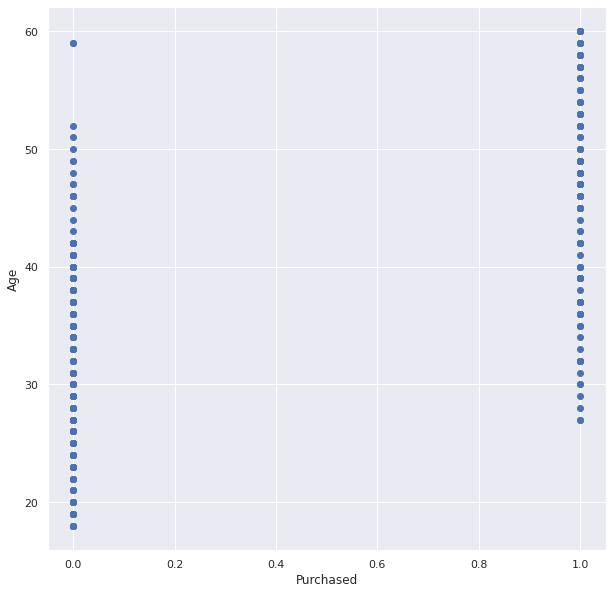

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(x='Purchased',y='Age',data=df)
plt.xlabel('Purchased')
plt.ylabel('Age')

Text(0, 0.5, 'EstimatedSalary')

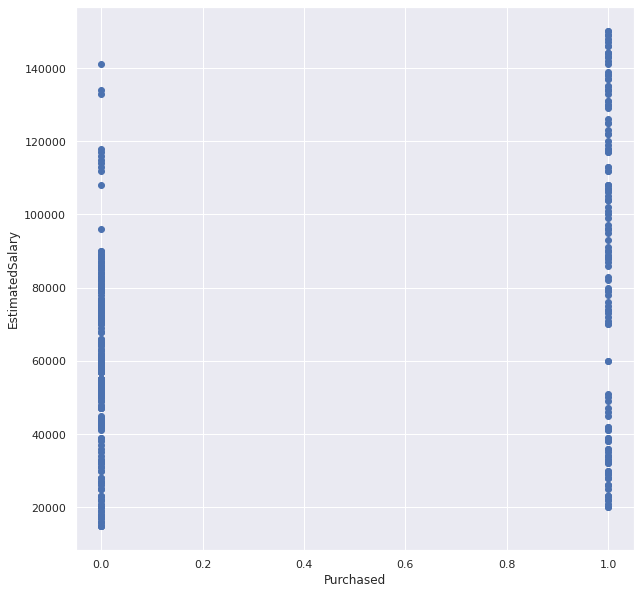

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(x='Purchased',y='EstimatedSalary',data=df)
plt.xlabel('Purchased')
plt.ylabel('EstimatedSalary')

In [29]:
X = df.drop(['Purchased'], axis = 1)
Y = df["Purchased"]
x_Data = X.values
y_Data = Y.values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [33]:
model.score(X_test,y_test)

0.925

In [34]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.859375 0.859375 0.859375 0.828125 0.859375]


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.8625

In [37]:
confusion_matrix(y_train, pred)

array([[191,  14],
       [ 30,  85]])

In [38]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [40]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80



In [41]:
cma = confusion_matrix(y_test, predicted_test)

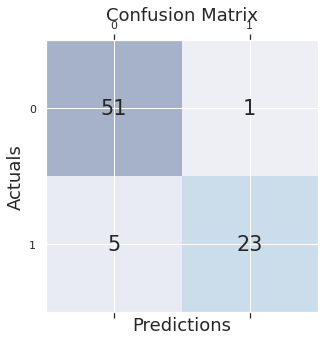

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [43]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [44]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [45]:
confusion_matrix(y_train, pred)

array([[205,   0],
       [  0, 115]])

In [46]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [47]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [48]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [49]:
cma = confusion_matrix(y_test, pred_test)

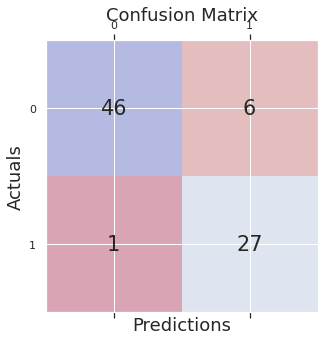

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [51]:
from sklearn import tree

In [52]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [53]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [54]:
confusion_matrix(y_train, pred1)

array([[205,   0],
       [  0, 115]])

In [55]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [56]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



In [57]:
cma = confusion_matrix(y_test, pred1_test)

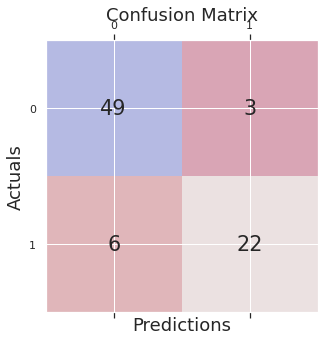

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [60]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.7875

In [61]:
confusion_matrix(y_train, pred_LR)

array([[197,   8],
       [ 60,  55]])

In [62]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [63]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



In [64]:
cma = confusion_matrix(y_test, pred_LR_test)

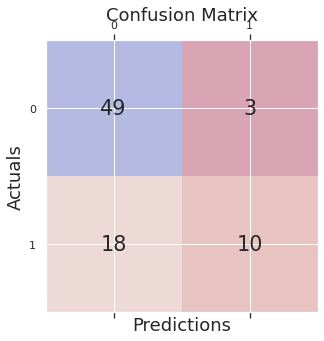

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [66]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [67]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.778125

In [68]:
confusion_matrix(y_train, pred_SVM)

array([[192,  13],
       [ 58,  57]])

In [69]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [70]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        52
           1       0.73      0.39      0.51        28

    accuracy                           0.74        80
   macro avg       0.74      0.66      0.67        80
weighted avg       0.74      0.74      0.71        80



In [71]:
cma = confusion_matrix(y_test, pred_SVM_test)

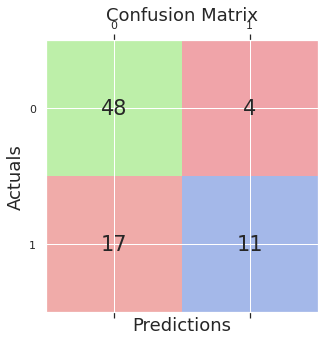

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [75]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.640625

In [76]:
confusion_matrix(y_train, pred_SVM)

array([[192,  13],
       [ 58,  57]])

In [77]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [78]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [79]:
cma = confusion_matrix(y_test, pred_NN_test)

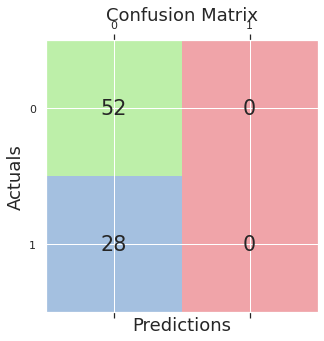

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

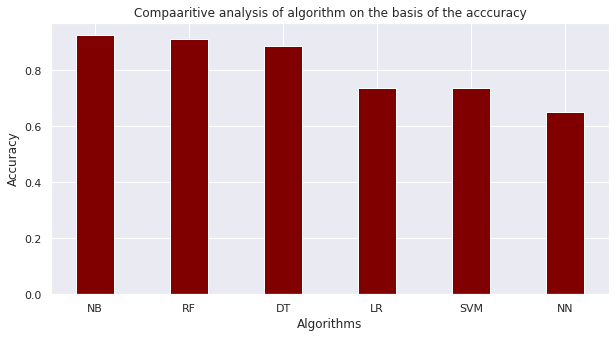

In [81]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


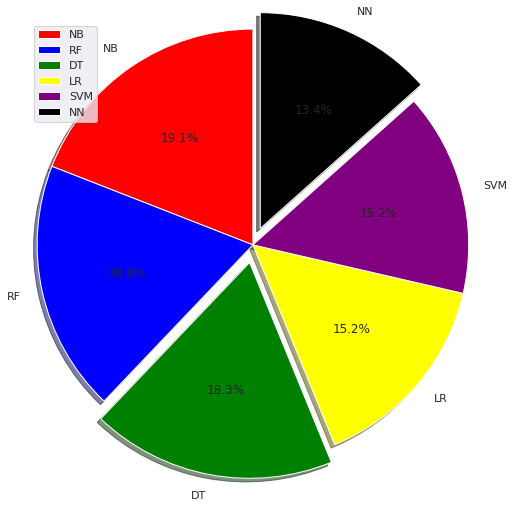

In [82]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN'] 
# portion covered by each label
slices = [p,q,r,s,t,u]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()